In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

In [3]:
#pip install sqlite

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
#engine = create_engine("sqlite:////full/path/to/Resources/hawaii.sqlite")
engine

Engine(sqlite:///Resources/hawaii.sqlite)

In [6]:
# reflect an existing database into a new model
Base= automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

#Station = Base.classes.station
#Measurement = Base.classes.measurement


C:\Users\ksarn\AppData\Local\Temp\ipykernel_24244\4037529278.py:4: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [7]:
# View all of the classes that automap found
#all_classes = Base.classes
#for cls in all_classes:
#    print(cls.__name__)


print(Base.classes.keys())

['station', 'measurement']


In [8]:
# Save references to each table

Station = Base.classes.station
Measurement = Base.classes.measurement
#Measurements = session.query(Measurement).all()

In [9]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)


# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
lastest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
lastest_date

('2017-08-23',)

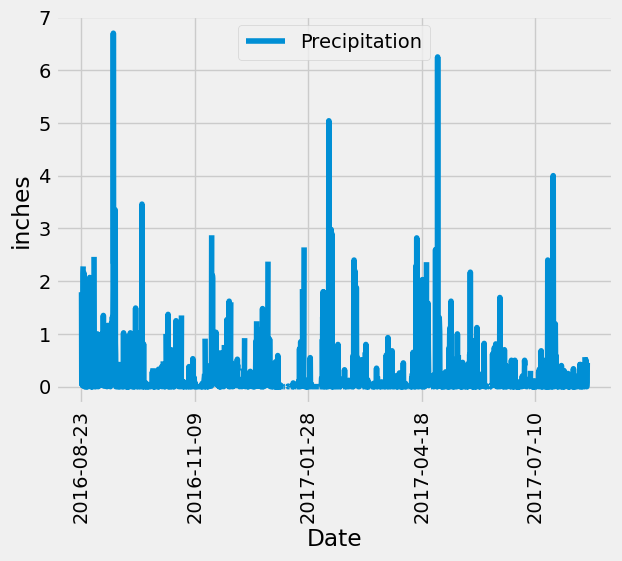

<Figure size 1000x600 with 0 Axes>

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_date = pd.to_datetime(lastest_date) - pd.DateOffset(years=1)
one_year_date

# Perform a query to retrieve the data and precipitation scores
Data_precipation_s = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_date[0].date()).all()

                                                                             #one_year_date.all())
                                                                           

# Save the query results as a Pandas DataFrame. Explicitly set the column names
Data_precipation_df = pd.DataFrame(Data_precipation_s, columns=['Date', 'Precipitation'])
Data_precipation_df
# Sort the dataframe by date
Data_sorted = Data_precipation_df.sort_values(by= 'Date', ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data
Data_sorted.plot(x="Date", y= "Precipitation", rot = 90)
plt.xlabel("Date")
plt.ylabel("inches")
plt.figure(figsize=(10,6))
plt.tight_layout()
plt.show()


In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
Data_precipation_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
total_no_stations = session.query(Station.id).count()
print(f"The Total number of Stations is :{total_no_stations}")

The Total number of Stations is :9


In [14]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
                                    order_by(func.count(Measurement.station).desc()).all()
# List the stations and their counts in descending order.
for station, count in most_active_stations:
    print(f"Active Station: {station}, Its Count: {count}")

Active Station: USC00519281, Its Count: 2772
Active Station: USC00519397, Its Count: 2724
Active Station: USC00513117, Its Count: 2709
Active Station: USC00519523, Its Count: 2669
Active Station: USC00516128, Its Count: 2612
Active Station: USC00514830, Its Count: 2202
Active Station: USC00511918, Its Count: 1979
Active Station: USC00517948, Its Count: 1372
Active Station: USC00518838, Its Count: 511


In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_stations_ID = most_active_stations[0][0] 
temperature_info =session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == most_active_stations_ID).all()

print(f"Temperature Levels for {most_active_stations_ID}:")
print(f"Lowest Temperature is: {temperature_info[0][0]} °F")
print(f"Highest Temperature is: {temperature_info[0][1]} °F")
print(f"Average Temperature is: {temperature_info[0][2]} °F")

Temperature Levels for USC00519281:
Lowest Temperature is: 54.0 °F
Highest Temperature is: 85.0 °F
Average Temperature is: 71.66378066378067 °F


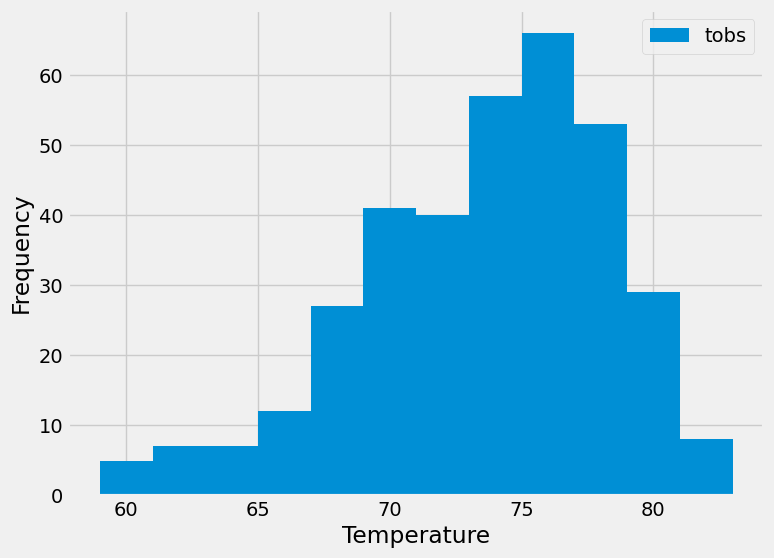

In [16]:
# Using the most active station id

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_data = session.query(Measurement.date, Measurement.tobs).\
            filter(Measurement.station == most_active_stations_ID).\
            filter(Measurement.date >= one_year_date[0].date()).all()
tobs_df = pd.DataFrame(tobs_data, columns=['Date', 'Temperature'])

plt.figure(figsize=(8, 6))
plt.hist(tobs_df['Temperature'], bins=12, label='tobs')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend()

# Close Session

In [17]:
# Close Session
session.close()